# An Overview of the Spanish Energy Generation

In [138]:
import pandas as pd #!

df_energy = pd.read_csv('all-technology_2019-2021.csv', index_col=0)
mask = df_energy.technology != 'Total Exports'


In [139]:
df_energy = df_energy[mask].copy()

In [141]:
mask = df_energy.technology != 'Total Imports'


In [142]:
df_energy = df_energy[mask].copy()

## [ ] Select the data from 2019

### Filter the rows

In [143]:
mask = df_energy.year == 2020

In [144]:
mask

0         False
1         False
2         False
3         False
4         False
          ...  
420859    False
420860    False
420861    False
420862    False
420863    False
Name: year, Length: 368256, dtype: bool

In [145]:
df_energy = df_energy[mask].copy()

In [146]:
df_energy


,technology,year,month,day,hour,generation_mwh
8760,Carbon,2020,1,1,0,430.0
8761,Carbon,2020,1,1,1,430.0
8762,Carbon,2020,1,1,2,417.0
8763,Carbon,2020,1,1,3,387.0
8764,Carbon,2020,1,1,4,387.0
...,...,...,...,...,...,...
412099,Other Renewables,2020,12,31,19,550.8
412100,Other Renewables,2020,12,31,20,553.0
412101,Other Renewables,2020,12,31,21,554.0
412102,Other Renewables,2020,12,31,22,549.0


### Drop the column `year`

In [147]:
df_energy = df_energy.drop(columns='year')


In [148]:
df_energy

,technology,month,day,hour,generation_mwh
8760,Carbon,1,1,0,430.0
8761,Carbon,1,1,1,430.0
8762,Carbon,1,1,2,417.0
8763,Carbon,1,1,3,387.0
8764,Carbon,1,1,4,387.0
...,...,...,...,...,...
412099,Other Renewables,12,31,19,550.8
412100,Other Renewables,12,31,20,553.0
412101,Other Renewables,12,31,21,554.0
412102,Other Renewables,12,31,22,549.0


### Reset the index to start from 0

In [149]:
df_energy.reset_index(drop = "true")

,technology,month,day,hour,generation_mwh
0,Carbon,1,1,0,430.0
1,Carbon,1,1,1,430.0
2,Carbon,1,1,2,417.0
3,Carbon,1,1,3,387.0
4,Carbon,1,1,4,387.0
...,...,...,...,...,...
122971,Other Renewables,12,31,19,550.8
122972,Other Renewables,12,31,20,553.0
122973,Other Renewables,12,31,21,554.0
122974,Other Renewables,12,31,22,549.0


## In total, how much energy was generated?

In [150]:
df_energy.generation_mwh.sum()

243062107.39999998

## [ ] Which was the technology that generated more energy?

### Data processing

#### Calculate the total generation by each technology

In [166]:
df_energy.groupby(by = 'technology').generation_mwh.sum()

technology
Carbon                      4986791.4
Cogeneration               27303335.0
Combined Cycle             38627477.1
Domestic Residuals          1224284.5
Eolic                      54071005.9
Hydraulic No UGH            6157685.0
Hydraulic UGH              24535195.2
Non-renewable Residuals     2551431.4
Nuclear                    55835857.9
Other Renewables            4624352.0
Other Residuals             1005444.9
Photovoltaic Solar         14903443.6
Photovoltaic Thermal        4817537.2
Pumping Turbine             2418266.3
Name: generation_mwh, dtype: float64

In [167]:
res = df_energy.groupby(by = 'technology').generation_mwh.sum()

#### Sort the most used technologies at the beginning of the table

In [168]:
res.sort_values(ascending = False)

technology
Nuclear                    55835857.9
Eolic                      54071005.9
Combined Cycle             38627477.1
Cogeneration               27303335.0
Hydraulic UGH              24535195.2
Photovoltaic Solar         14903443.6
Hydraulic No UGH            6157685.0
Carbon                      4986791.4
Photovoltaic Thermal        4817537.2
Other Renewables            4624352.0
Non-renewable Residuals     2551431.4
Pumping Turbine             2418266.3
Domestic Residuals          1224284.5
Other Residuals             1005444.9
Name: generation_mwh, dtype: float64

#### Reset the index to transform the previous object to a `DataFrame`

In [174]:
res = res.sort_values(ascending = False).reset_index()


### Visualize the data with a bar plot

In [67]:
import plotly.express as px

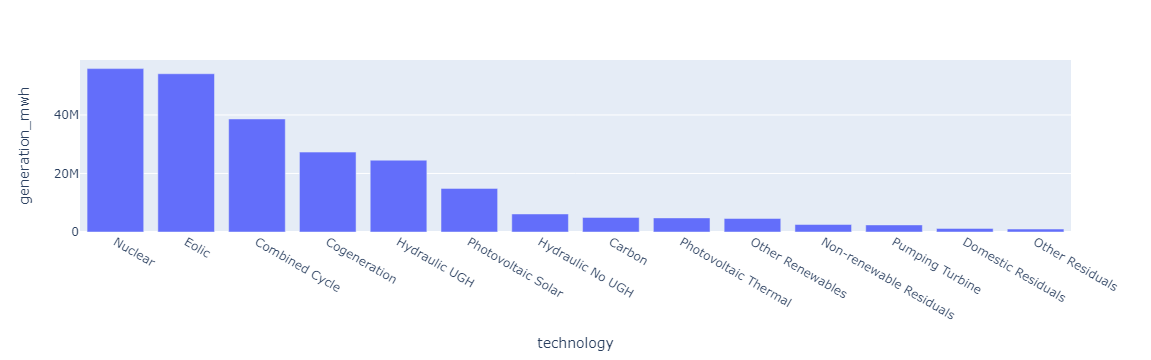

In [175]:
px.bar(data_frame = res, x = 'technology', y = 'generation_mwh')

### Customize the bar plot

#### Make the bars horizontal

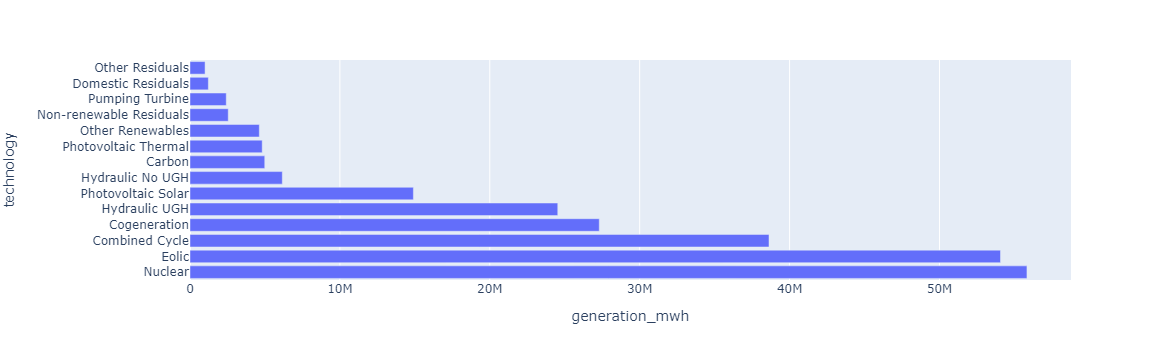

In [176]:
px.bar(data_frame = res, y = 'technology', x = 'generation_mwh')

#### Sort the data and visualize it again

In [72]:
res = res.sort_values('generation_mwh')

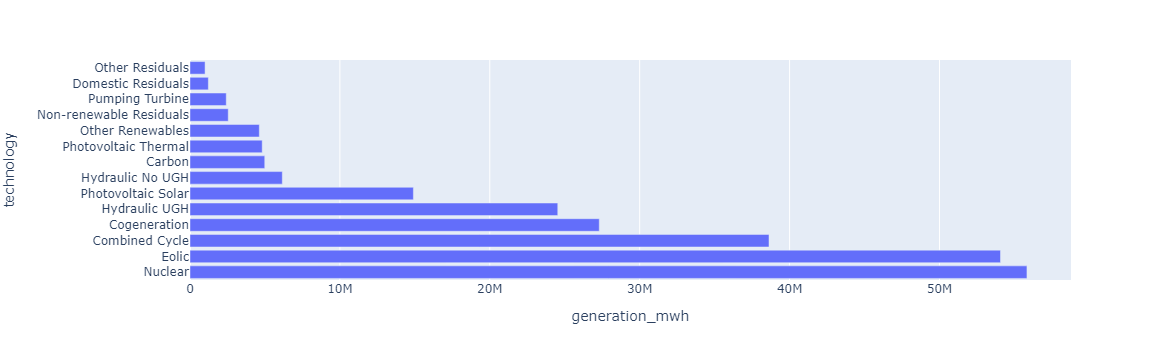

In [177]:
px.bar(data_frame = res, y = 'technology', x = 'generation_mwh')

### Is a pie plot better for this data?

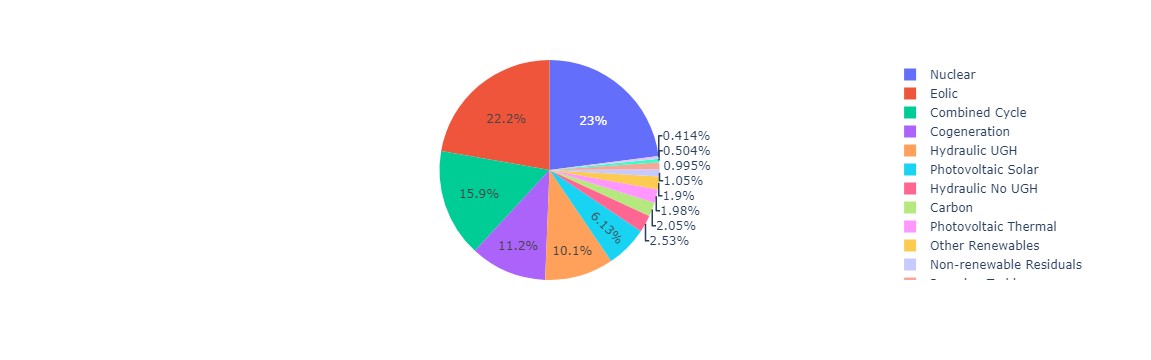

In [74]:
px.pie(data_frame = res, names = 'technology', values = 'generation_mwh')

## [ ] Which was the month that demanded more energy?

### Data processing

In [107]:
df_energy

,technology,year,month,day,hour,generation_mwh
0,Carbon,2019,1,1,0,1867.0
1,Carbon,2019,1,1,1,1618.0
2,Carbon,2019,1,1,2,1535.3
3,Carbon,2019,1,1,3,1344.0
4,Carbon,2019,1,1,4,1345.0
...,...,...,...,...,...,...
420859,Other Renewables,2021,12,31,19,602.7
420860,Other Renewables,2021,12,31,20,608.2
420861,Other Renewables,2021,12,31,21,606.7
420862,Other Renewables,2021,12,31,22,607.5


In [83]:
df_energy.groupby(by = 'month').generation_mwh.sum().reset_index()

,month,generation_mwh
0,1,23538414.9
1,2,20666009.2
2,3,20848132.0
3,4,16992861.7
4,5,17990653.9
5,6,18854161.9
6,7,22674016.4
7,8,21561721.0
8,9,20104144.0
9,10,20328117.8


In [84]:
month = df_energy.groupby(by = 'month').generation_mwh.sum().reset_index()

### Data visualization

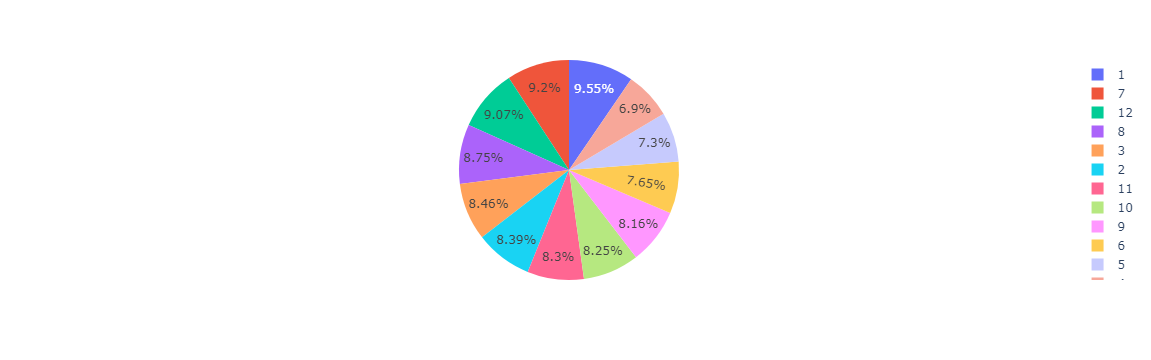

In [85]:
px.pie(data_frame = month, names = 'month', values= 'generation_mwh') 


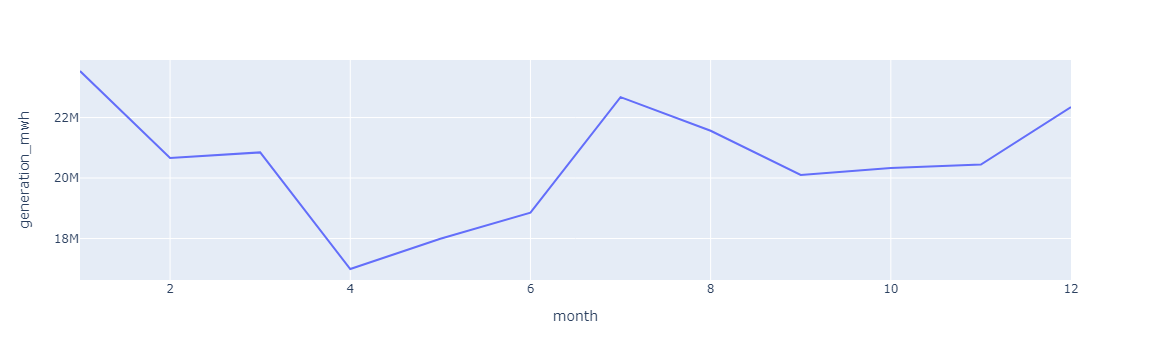

In [87]:
px.line(data_frame = month, x = 'month', y= 'generation_mwh') 

## [ ] Which was the month-technology that generated more energy?

### Data processing

In [179]:
df_techno_month = df_energy.groupby(by = ['technology', 'month']).generation_mwh.sum().reset_index()

### Data visualization

#### Create a bar plot

##### Differentiate each technology with a `color`

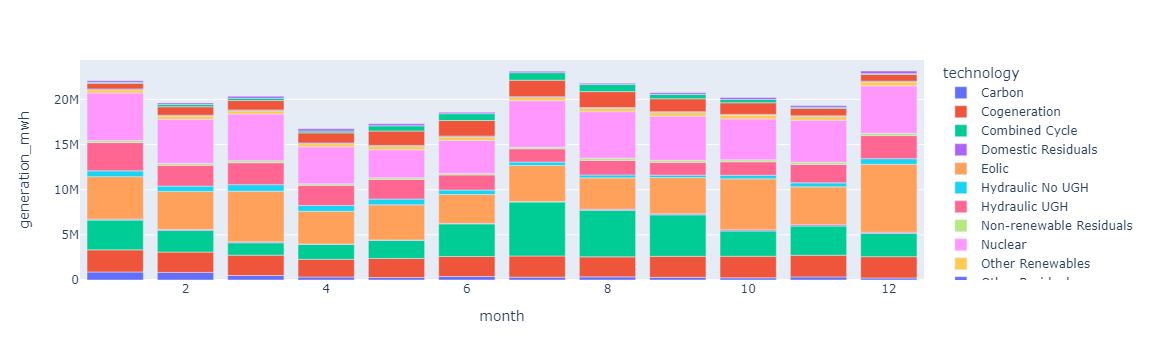

In [180]:
px.bar(data_frame = df_techno_month, x = 'month', y = 'generation_mwh', color = 'technology')

##### Differentiate each technology with a `facet_col`

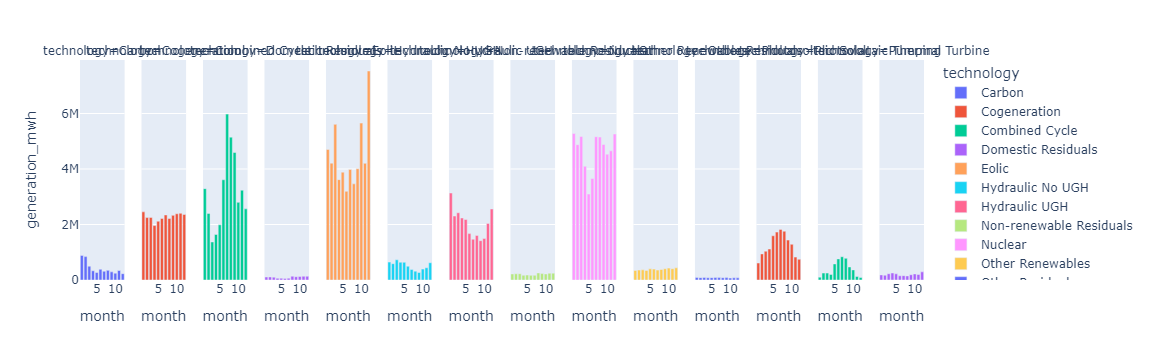

In [181]:
px.bar(data_frame = df_techno_month, x = 'month', y = 'generation_mwh', color = 'technology', facet_col = 'technology')

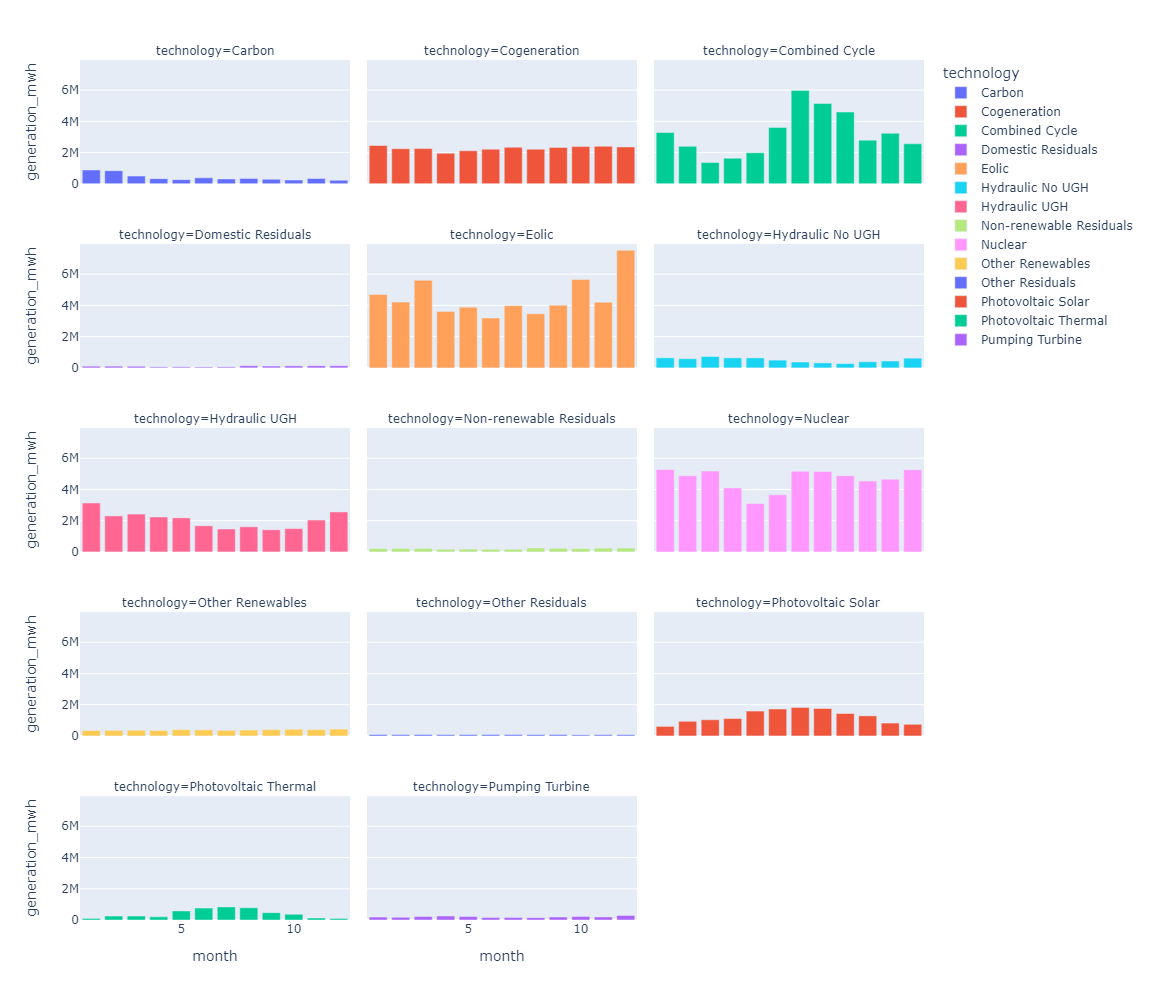

In [183]:
px.bar(data_frame = df_techno_month, x = 'month', y = 'generation_mwh', color = 'technology', facet_col = 'technology', facet_col_wrap = 3, height= 1000)

#### Create an area plot

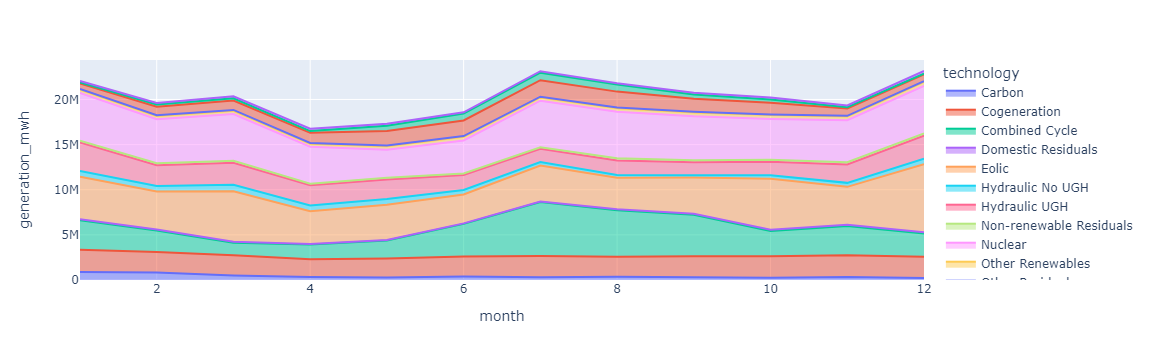

In [184]:
px.area(data_frame = df_techno_month, x = 'month', y = 'generation_mwh', color = 'technology')

## [ ] How much energy was generated each hour of the year?

### Data Processing

In [190]:
res = df_energy.groupby(by = ['month', 'day', 'hour']).generation_mwh.sum()

In [193]:
dfres = res.reset_index()

In [194]:
dfres

,month,day,hour,generation_mwh
0,1,1,0,22582.6
1,1,1,1,22595.0
2,1,1,2,22200.1
3,1,1,3,21926.4
4,1,1,4,22281.4
...,...,...,...,...
8778,12,31,19,32662.7
8779,12,31,20,31540.8
8780,12,31,21,30519.0
8781,12,31,22,29111.6


### Data visualization

#### Create a histogram

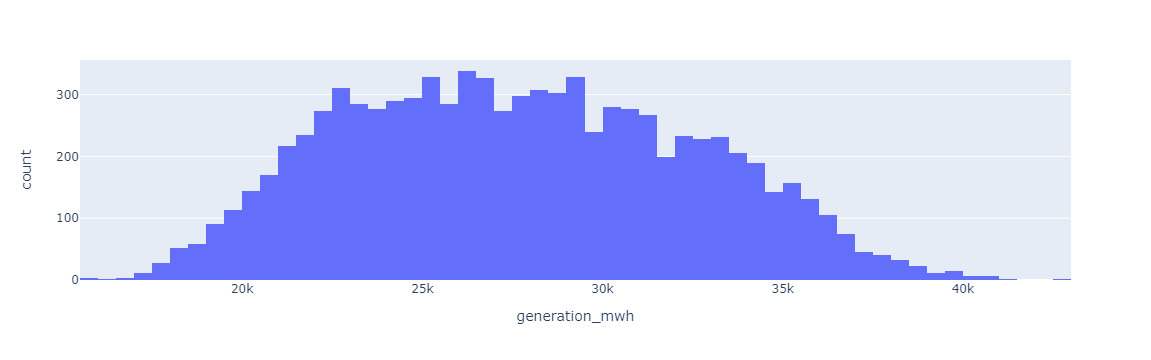

In [195]:
px.histogram(data_frame = dfres, x = 'generation_mwh')

#### Create a boxplot

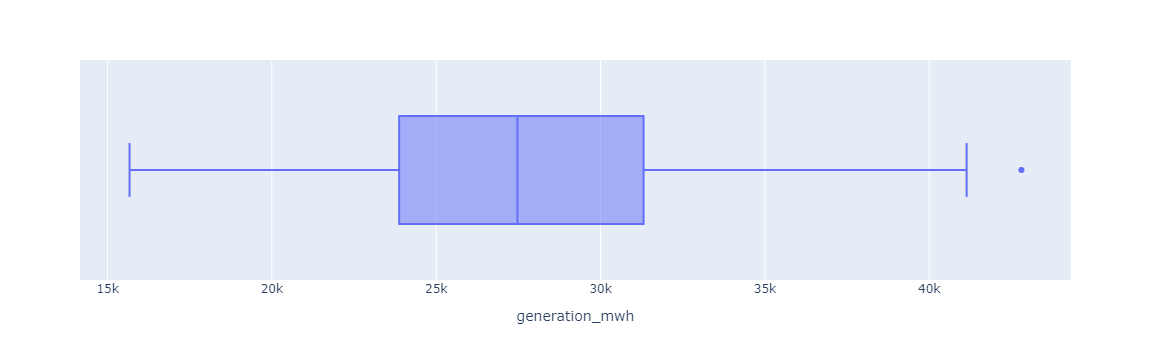

In [196]:
px.box(data_frame = dfres, x = 'generation_mwh')